In [3]:
import pandas as pd

# Load the dataset
df = pd.read_csv("diabetes.csv")

In [5]:
# Check for missing values in each column
print(df.isnull().sum())
# Drop rows with missing values (if any)
df = df.dropna()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


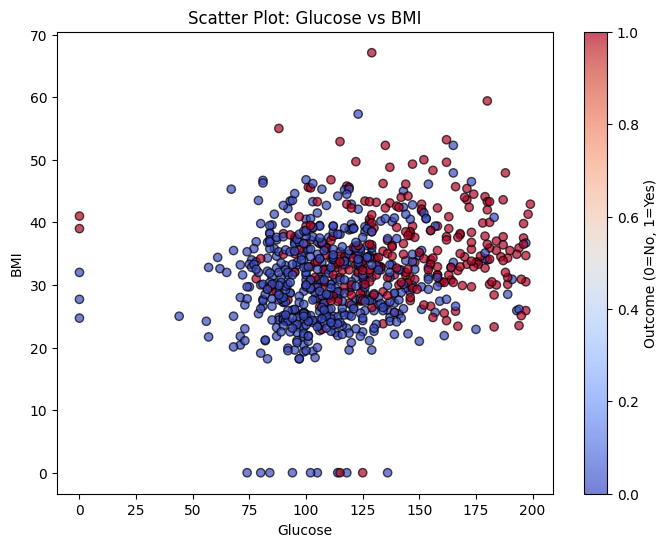

In [6]:
import matplotlib.pyplot as plt

# Scatter plot to visualize glucose vs. BMI with target color-coded
plt.figure(figsize=(8, 6))
plt.scatter(df['Glucose'], df['BMI'], c=df['Outcome'], cmap='coolwarm', edgecolors='k', alpha=0.7)
plt.title('Scatter Plot: Glucose vs BMI')
plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.colorbar(label='Outcome (0=No, 1=Yes)')
plt.show()

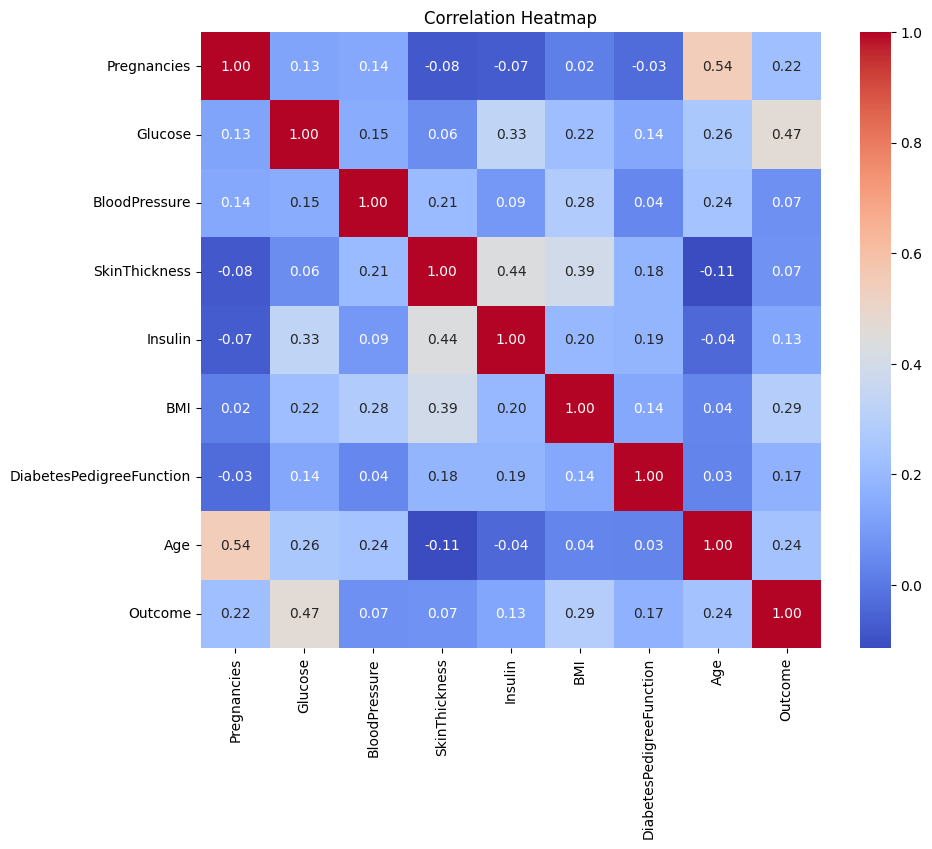

In [7]:
import seaborn as sns

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [8]:
from sklearn.preprocessing import StandardScaler

# Define the features (X) and target (y)
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Standardize the features (only numeric columns)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [9]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the Logistic Regression model
logreg_model = LogisticRegression(max_iter=200)

# Train the model
logreg_model.fit(X_train, y_train)

# Predictions on the test set
y_pred_logreg = logreg_model.predict(X_test)

# Evaluate the model
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("Logistic Regression Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logreg))
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_logreg))

Logistic Regression Accuracy: 0.7532467532467533
Logistic Regression Confusion Matrix:
 [[79 20]
 [18 37]]
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



In [11]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Initialize and train LDA model
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train, y_train)

# Predictions on the test set
y_pred_lda = lda_model.predict(X_test)

# Evaluate the model
print("LDA Accuracy:", accuracy_score(y_test, y_pred_lda))
print("LDA Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lda))
print("LDA Classification Report:\n", classification_report(y_test, y_pred_lda))

LDA Accuracy: 0.7597402597402597
LDA Confusion Matrix:
 [[80 19]
 [18 37]]
LDA Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.81      0.81        99
           1       0.66      0.67      0.67        55

    accuracy                           0.76       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.76      0.76      0.76       154

